# Project: Investigate a Dataset (Gapminder World)
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

Data Set Name :Gapminder World

Investigate some indicators about how people live their lives in different countires tracked acroos years the indicators will be analysed are :
>
#### 1-Total population.<br>
#### 2-Income per per person (Gross domestic product per person).<br>
#### 3-Total GDP (Gross domestic converted to international dollars using purchasing power).<br>
#### 4-Death rate (the average number of death per 1000 population).<br>
#### 5-Birth rate (the average number of birth per 1000 population).<br>
>
This investigation try to answer this question  have certain regions
of the world been growing in better than others? are there trends that can be observed between the selected in indicators?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_population= pd.read_csv('population_total.csv')
df_income=pd.read_csv('income_per_person.csv')
df_total_gdp=pd.read_csv('total_gdp_us_inflation_adjusted.csv')
df_death_rate=pd.read_csv('crude_death_rate_deaths_per_1000_population.csv')
df_birth_rate=pd.read_csv('sp_dyn_cbrt_in.csv')

In [3]:
#checking the shape for all the data sets
print(df_population.shape,df_income.shape, df_total_gdp.shape, df_death_rate.shape, df_birth_rate.shape)

(195, 302) (193, 242) (191, 61) (184, 151) (192, 60)


## diffrent shape issue

# cheaking for the five indicators :

## population data set :

In [4]:
#checking sample
df_population.head(1)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,76600000,76400000,76300000,76100000,76000000,75800000,75600000,75400000,75200000,74900000


In [5]:
#checkin for duplication 
df_population.duplicated().sum()

0

In [6]:
#chicking general info
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: int64(301), object(1)
memory usage: 460.2+ KB


In [7]:
#chicking for missing values
sum(df_population.isnull().sum())

0

In [8]:
#chicking for dupliction in country column 
df_population['country'].nunique() == df_population['country'].count()

True

## income data set :

In [9]:
#checking sample
df_income.head(1)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060


In [10]:
#checkin for duplication 
df_income.duplicated().sum()

0

In [11]:
#chicking general info
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Columns: 242 entries, country to 2040
dtypes: int64(241), object(1)
memory usage: 365.0+ KB


In [12]:
#chicking for missing values
sum(df_income.isnull().sum())

0

In [13]:
#chicking for dupliction in country column 
df_income['country'].nunique() == df_income['country'].count()

True

## total gdp data set :

In [14]:
#checking sample
df_total_gdp.head(1)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.590000e+10,1.590000e+10,1.800000e+10,1.900000e+10,1.950000e+10,1.980000e+10,2.020000e+10,2.070000e+10,2.110000e+10,2.170000e+10


In [15]:
#checkin for duplication 
df_total_gdp.duplicated().sum()

0

In [16]:
#chicking general info
df_total_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 61 columns):
country    191 non-null object
1960       87 non-null float64
1961       89 non-null float64
1962       89 non-null float64
1963       89 non-null float64
1964       89 non-null float64
1965       93 non-null float64
1966       96 non-null float64
1967       97 non-null float64
1968       99 non-null float64
1969       99 non-null float64
1970       112 non-null float64
1971       112 non-null float64
1972       112 non-null float64
1973       112 non-null float64
1974       114 non-null float64
1975       117 non-null float64
1976       118 non-null float64
1977       123 non-null float64
1978       123 non-null float64
1979       124 non-null float64
1980       134 non-null float64
1981       138 non-null float64
1982       140 non-null float64
1983       140 non-null float64
1984       142 non-null float64
1985       143 non-null float64
1986       146 non-null float64
1987      

In [17]:
#chicking for missing values
sum(df_total_gdp.isnull().sum())

2458

In [18]:
#chicking for dupliction in country column 
df_total_gdp['country'].nunique() == df_total_gdp['country'].count()

True

## death_rate data set :

In [19]:
#checking sample
df_death_rate.head(1)

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,38.2,37.8,37.2,36.5,35.9,35.3,34.6,34.0,33.4,...,11.3,11.4,11.5,11.7,11.8,11.9,12.0,12.1,12.2,12.3


In [20]:
#checkin for duplication 
df_death_rate.duplicated().sum()

0

In [21]:
#chicking general info
df_death_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Columns: 151 entries, country to 2099
dtypes: float64(150), object(1)
memory usage: 217.1+ KB


In [22]:
#chicking for missing values
sum(df_death_rate.isnull().sum())

0

In [23]:
#chicking for dupliction in country column 
df_death_rate['country'].nunique() == df_death_rate['country'].count()

True

## birth_rate data set :

In [24]:
#checking sample
df_birth_rate.head(1)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,51.3,51.4,51.5,51.5,51.6,51.6,51.7,51.6,51.6,...,40.9,39.8,38.8,37.7,36.7,35.7,34.8,34.0,33.2,32.5


In [25]:
#checkin for duplication 
df_birth_rate.duplicated().sum()

0

In [26]:
#chicking general info
df_birth_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 60 columns):
country    192 non-null object
1960       182 non-null float64
1961       182 non-null float64
1962       182 non-null float64
1963       182 non-null float64
1964       182 non-null float64
1965       182 non-null float64
1966       182 non-null float64
1967       182 non-null float64
1968       182 non-null float64
1969       182 non-null float64
1970       184 non-null float64
1971       183 non-null float64
1972       184 non-null float64
1973       184 non-null float64
1974       184 non-null float64
1975       184 non-null float64
1976       185 non-null float64
1977       185 non-null float64
1978       185 non-null float64
1979       185 non-null float64
1980       185 non-null float64
1981       185 non-null float64
1982       185 non-null float64
1983       185 non-null float64
1984       185 non-null float64
1985       184 non-null float64
1986       185 non-null float64


In [27]:
#chicking for missing values
sum(df_birth_rate.isnull().sum())

358

In [28]:
#chicking for dupliction in country column 
df_birth_rate['country'].nunique() == df_birth_rate['country'].count()

True

# issues report:
#### diffrent shape in all the sets
#### total_gdp set has 2458 missing value
#### death_rate has 184 country the smallest set in countries from all the data sets
#### birth_rate the years begin from 1960 to 2018
#### birth_rate has 358 missing vlaue

### Data Cleaning (Replace this with more specific notes!)

### subset all the indicators data set from 1960 to 2018

In [29]:
df_population.reset_index(drop=True)
df_population.set_index('country', inplace=True) #seting country column as index
new_population_year=df_population.loc[:,'1960':'2018'] #slicing subset from 1960 to 2018
new_population_year.shape 

(195, 59)

In [30]:
df_income.reset_index(drop=True)
df_income.set_index('country', inplace=True) #seting country column as index
new_income_year=df_income.loc[:,'1960':'2018'] #slicing subset from 1960 to 2018
new_income_year.shape

(193, 59)

In [31]:
df_total_gdp.reset_index(drop=True)
df_total_gdp.set_index('country', inplace=True) #seting country column as index
new_gdp_year = df_total_gdp.loc[:,'1960':'2018'] #slicing subset from 1960 to 2018
new_gdp_year.shape

(191, 59)

In [32]:
df_death_rate.reset_index(drop=True)
df_death_rate.set_index('country', inplace=True) #seting country column as index
new_death_rate = df_death_rate.loc[:,'1960':'2018'] #slicing subset from 1960 to 2018
new_death_rate.shape

(184, 59)

In [33]:
df_birth_rate.reset_index()
df_birth_rate.set_index('country', inplace=True)
df_birth_rate.shape

(192, 59)

### fixing countries issue

#### finding the real number for the countries 

In [34]:
len(set(new_death_rate.index)&set(df_birth_rate.index)&set(new_gdp_year.index)&set(new_income_year.index)&set(new_population_year.index))

181

there is 181 country not 184 so finding the comman countries between all the sets

In [35]:
countries=set(new_death_rate.index)&set(df_birth_rate.index)&set(new_gdp_year.index)&set(new_income_year.index)&set(new_population_year.index)

In [36]:
new_population=new_population_year.loc[countries,:] #slicing subset using the comman countries
new_population.shape

(181, 59)

In [37]:
new_income=new_income_year.loc[countries,:] #slicing subset using the comman countries
new_income.shape

(181, 59)

In [38]:
new_gdp=new_gdp_year.loc[countries,:] #slicing subset using the comman countries
new_gdp.shape

(181, 59)

In [39]:
new_death_rate=new_death_rate.loc[countries,:] #slicing subset using the comman countries
new_death_rate.shape

(181, 59)

In [40]:
new_birth_rate=df_birth_rate.loc[countries,:] #slicing subset using the comman countries
new_birth_rate.shape

(181, 59)

##### chicking for indintical of countries 

In [41]:
new_population.index.all()==new_income.index.all()==new_gdp.index.all()==new_death_rate.index.all()==new_birth_rate.index.all()

True

##### chicking for indintical of years

In [42]:
new_population.columns.all()==new_income.columns.all()==new_gdp.columns.all()==new_death_rate.columns.all()==new_birth_rate.columns.all()

True

### fixing missing values 

#### birth rate set missing value 

In [43]:
sum(new_birth_rate.isnull().sum())

75

it was 358 missing in the orginal data set and now it is 75 after reshapeing

In [44]:
new_birth_rate.fillna(new_birth_rate.mean(), inplace=True) # filling the missing values with mean
sum(new_birth_rate.isnull().sum())

0

In [45]:
sum(new_gdp.isnull().sum())

2157

it was 2458 in the orginal but now it is 2157 after reshapeing

In [46]:
new_gdp.fillna(new_gdp.mean(), inplace=True) # filling the missing values with mean
sum(new_gdp.isnull().sum())

0

## merging all data frame 

#### making multi index for the mergied data frame 

In [47]:
countries=[]
years=[]
population_values=[]
income_values=[]
gdp_values=[]
death_rate_values=[]
birth_rate_values=[]
new_population.sort_index(inplace=True)

##### get the values of each indicator 

In [48]:
for country in new_population.index:
    for year in new_population.columns:
        countries.append(country)
        years.append(year)
        population_values.append(new_population.loc[country,year])    #slice population indicator
        income_values.append(new_income.loc[country,year])            #slice income indicator
        gdp_values.append(new_gdp.loc[country,year])                  #slice gdp indicator
        death_rate_values.append(new_death_rate.loc[country,year])    #slice death_rate indicator
        birth_rate_values.append(new_birth_rate.loc[country,year])    #slice birth_rate indicator

makeing product from countries and years to use it as multi index

In [49]:
iterables = [new_population.index,new_population.columns]

###### making the merged data frame with country and year as mutli index (country,year)and the indicators as columns

In [50]:
dfx = pd.MultiIndex.from_product(iterables, names=['country', 'year']).to_frame()
dfx['population']=population_values
dfx['income']=income_values
dfx['gdp']=gdp_values
dfx['death_rate']=death_rate_values
dfx['birth_rate']=birth_rate_values

In [51]:
dfx.drop(['country','year'], inplace=True,axis=1) #drop the country and year columns

In [52]:
dfx.describe()

,population,income,gdp,death_rate,birth_rate
count,1.067900e+04,10679.000000,1.067900e+04,10679.000000,10679.000000
mean,2.860427e+07,12401.925180,2.449388e+11,10.874011,29.433460
std,1.114477e+08,17487.720763,9.359017e+11,5.493662,13.074623
min,4.120000e+04,312.000000,9.940000e+07,1.130000,6.400000
25%,1.610000e+06,2400.000000,6.610000e+09,7.080000,17.400000
50%,5.410000e+06,6130.000000,4.260000e+10,9.540000,29.500000
75%,1.685000e+07,15300.000000,1.865447e+11,13.000000,41.400000
max,1.430000e+09,179000.000000,1.790000e+13,54.400000,58.200000


In [53]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10679 entries, (Afghanistan, 1960) to (Zimbabwe, 2018)
Data columns (total 5 columns):
population    10679 non-null int64
income        10679 non-null int64
gdp           10679 non-null float64
death_rate    10679 non-null float64
birth_rate    10679 non-null float64
dtypes: float64(3), int64(2)
memory usage: 457.9+ KB


In [54]:
dfx.head()

population  income           gdp  death_rate  birth_rate
country     year                                                          
Afghanistan 1960     9000000    2740  1.010542e+11        32.2        51.3
            1961     9170000    2700  1.032279e+11        31.6        51.4
            1962     9350000    2680  1.088010e+11        31.1        51.5
            1963     9540000    2670  1.146303e+11        30.6        51.5
            1964     9740000    2650  1.222843e+11        30.0        51.6

In [166]:
# function for plotting comparsion between one indicators in two years 
def plotting_two_years_comparsion(data_frame_name, year1, year2, x_label, y_label, title) :
    plt.plot(data_frame_name.loc[:,[year1,year2]]);
    plt.legend([year1,year2]);
    plt.xlabel(x_label);
    plt.ylabel(y_label);
    plt.title(title);

In [171]:
#function for plotting one indicator for one year

def plotting_indicator_in_year(data_frame, year, x_label, y_label, title):
    plt.plot(data_frame.loc[:,year].sort_values(ascending=False));
    plt.legend(y_label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title);

In [137]:
#function for plotting increase for one indicator and sort the result

def plotting_rate_of_increase (data_frame, last_year, first_year, x_label, y_label, title):
    df=data_frame.loc[:,last_year] - data_frame.loc[:,first_year]
    plt.plot(df.sort_values(ascending=False));
    plt.legend(y_label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title);     

In [129]:
#function to compare two countries for one indicator
def compare_two_country(data_frame, country_1, country_2, indicator, color_1, color_2, country_name_1, country_name_2, x_label, y_label, title) :
    plt.plot(dfx.loc[(country_1)][indicator], c=color_1, label=country_name_1);    
    plt.plot(dfx.loc[(country_2)][indicator], c=color_2, label=country_name_2);
    plt.legend()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

<a id='eda'></a>
## Exploratory Data Analysis

### Have certain regions been growing better than other?

#### Population indicator

##### Population compare 1960 , 2018

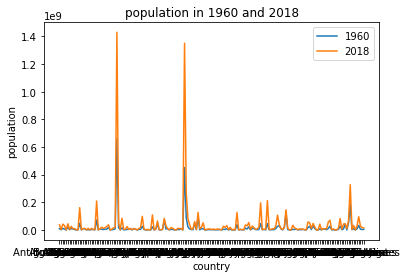

In [167]:
plotting_two_years_comparsion(new_population,
                     '1960','2018','country',
                     'population',
                     'population in 1960 and 2018')

That figer showes that how population increase in most of the countries from 1960 to 2018 country in X axe and population in y axes

In [168]:
new_population.loc[:,'2018'].sum()-new_population.loc[:,'1960'].sum()

4534244700

Population for all countries increase buy 4534244700 pepole thorw 1960 to 2018

##### Population in 1960

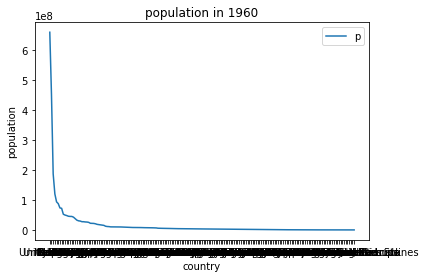

In [255]:
plotting_indicator_in_year(new_population,'1960', 'country', 'population', 'population in 1960')

That figer shows population in 1960 countries for X axe and population for Y axe

In [59]:
dfx.reset_index().groupby(['year'])['population'].max()[0]
dfx.query('population==660000000')['population']

country  year
China    1960    660000000
Name: population, dtype: int64

China was number one in population in 1960

In [257]:
dfx.reset_index().groupby(['year'])['population'].min()[0]
dfx.query('population==41200')['population']

country   year
Kiribati  1960    41200
Name: population, dtype: int64

Kiribati was the lowest country in population in 1960

>First country China with 660000000<br>
>Last country Kiribati with 41200 

##### Population in 2018 

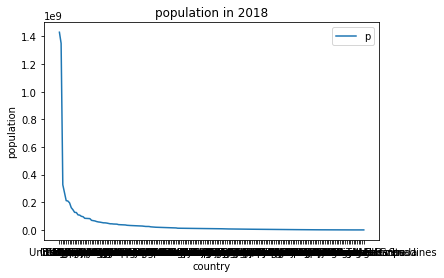

In [258]:
plotting_indicator_in_year(new_population,'2018', 'country', 'population', 'population in 2018')

That figer shows population in 2018 countries for X axe and population for Y axe

In [139]:
dfx.reset_index().groupby(['year'])['population'].max()[-1]
dfx.query('population==1430000000')['population']

country  year
China    2018    1430000000
Name: population, dtype: int64

China was number one in population in 2018

In [140]:
dfx.reset_index().groupby(['year'])['population'].min()[-1]
dfx.query('population==96300')['population']

country                year
Antigua and Barbuda    2018    96300
Grenada                1990    96300
Micronesia, Fed. Sts.  1990    96300
Tonga                  1996    96300
Name: population, dtype: int64

Antigua and Barbuda was the lowest counrty in population in 2018
But also the result for that query show us there are other's country has the same population in 1990 and 1996 that mean that countries are grown in population .

>First country China with 1430000000<br>
>Last country Antigua and Barbuda with 96300 

##### rate of  increase

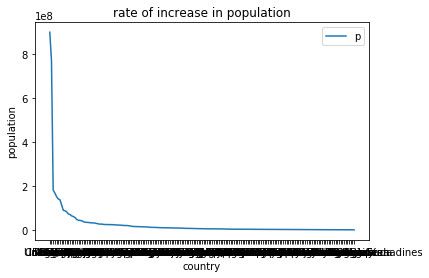

In [259]:
plotting_rate_of_increase(new_population,'2018', '1960',
                          'country', 'population', 
                          'rate of increase in population')

That figer shows population diffrence between 1960 and 2018 after sorting countries for X axe and population for Y axe

##### Compare between China the country number one in the popultion and India the country number one in population increase

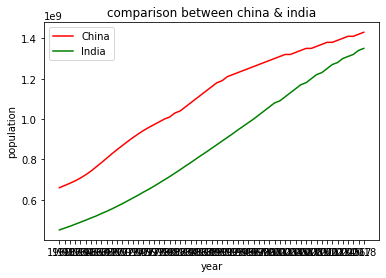

In [175]:
compare_two_country(dfx, 'China', 'India', 'population', 
                    'red', 'green', 'China', 'India', 
                     'year', 'population', 
                    'comparison between china & india')

India grow in population in fast way more than china and other country

#### Income indicator

##### Income compare 1960 , 2018

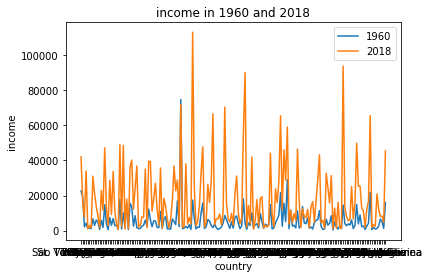

In [177]:
plotting_two_years_comparsion(new_income,
                     '1960','2018','country',
                     'income',
                     'income in 1960 and 2018')

That figer showes that how income increase in most of the countries from 1960 to 2018 country in X axe and income in Y axes

In [260]:
new_income.loc[:,'2018'].sum()-new_income.loc[:,'1960'].sum()

2300050

Income for all countries increase buy 2300050$ thorw 1960 to 2018

##### Income in 1960

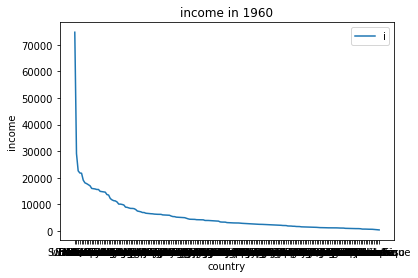

In [261]:
plotting_indicator_in_year(new_income,'1960', 'country', 'income', 'income in 1960')

That figer shows income in 1960 countries for X axe and population for Y

In [180]:
dfx.reset_index().groupby(['year'])['income'].max()[0]
dfx.query('income==74700')['income']

country  year
Brunei   1960    74700
Name: income, dtype: int64

Brunei was number one in income in 1960

In [181]:
dfx.reset_index().groupby(['year'])['income'].min()[0]
dfx.query('income==404')['income']

country     year
Mozambique  1960    404
Name: income, dtype: int64

Mozambique was the lowest country in income in 1960

>First country Brunei with 74700<br>
>Last country Mozambique with 404 

##### Income in 2018

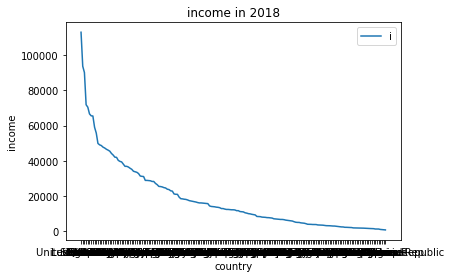

In [182]:
plotting_indicator_in_year(new_income,'2018', 'country', 'income', 'income in 2018')

That figer shows income in 2018 countries for X axe and population for Y

In [262]:
dfx.reset_index().groupby(['year'])['income'].max()[-1]
dfx.query('income== 113000 & year=="2018"')['income']

country  year
Qatar    2018    113000
Name: income, dtype: int64

Qatar was number one in income in 2018

In [263]:
dfx.reset_index().groupby(['year'])['income'].min()[-1]
dfx.query('income==660 & year=="2018"')['income']

country  year
Burundi  2018    660
Name: income, dtype: int64

Burundi was the lowest counrty in population in 2018

>First country Qatar with 113000<br>
>Last country Burundi with 660 

##### rate of  increase 

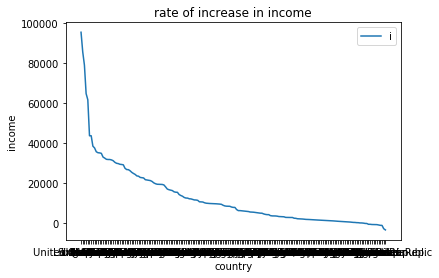

In [185]:
plotting_rate_of_increase(new_income,'2018', '1960',
                          'country', 'income', 
                          'rate of increase in income')

That figer shows income diffrence between 1960 and 2018 after sorting countries for X axe and population for Y axe

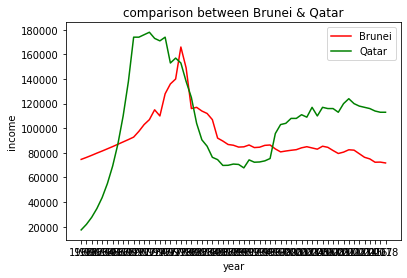

In [186]:
compare_two_country(dfx, 'Brunei', 'Qatar', 'income', 
                    'red', 'green', 'Brunei', 'Qatar', 
                     'year', 'income', 
                    'comparison between Brunei & Qatar')

Compare between Brunei the country number one in the income in 1960 and Qatar the country number one in income increase and in income for 2018

#### Gdp indicator

##### Gdp compare 1960 , 2018 

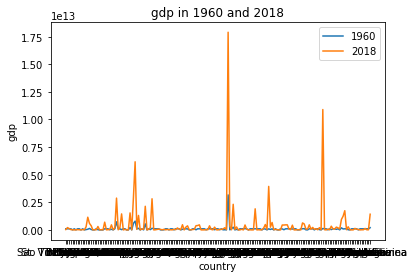

In [187]:
plotting_two_years_comparsion(new_gdp,
                     '1960','2018','country',
                     'gdp',
                     'gdp in 1960 and 2018')

That figer showes that how gdp increase in most of the countries from 1960 to 2018 country in X axe and gdp in y axes

In [264]:
new_gdp.loc[:,'2018'].sum()-new_gdp.loc[:,'1960'].sum()

64738808586115.47

Gdp for all countries increase buy 64738808586115.47$ thorw 1960 to 2018

##### Gdp in 1960 

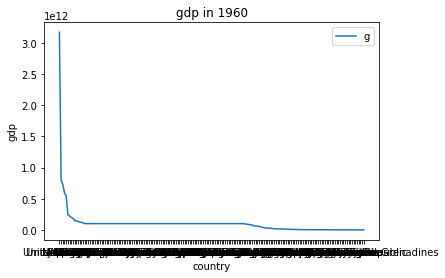

In [265]:
plotting_indicator_in_year(new_gdp,'1960', 'country', 'gdp', 'gdp in 1960')

That figer shows gdp in 1960 countries for X axe and gdp for Y

In [190]:
dfx.reset_index().groupby(['year'])['gdp'].max()[0]
dfx.query('gdp== 3170000000000.0')['gdp']

country        year
Germany        2001    3.170000e+12
United States  1960    3.170000e+12
Name: gdp, dtype: float64

United States was number one in gdp in 1960 but on the other side germany reach that number in 2001
lets see how germany grown in gdp in 1960

In [281]:
dfx.query('country=="Germany" & year=="1960"')['gdp']

country  year
Germany  1960    1.010542e+11
Name: gdp, dtype: float64

Germany grown from 1.010542e+11 in 1960 to 3.170000e+12 in 2001

In [282]:
dfx.reset_index().groupby(['year'])['gdp'].min()[0]
dfx.query('gdp== 99400000.0')['gdp']

country  year
Belize   1960    99400000.0
Name: gdp, dtype: float64

Belize was the lowest country in gdp in 1960

>First country United States with 3170000000000.0<br>
>Last country Belize with 99400000.0 

##### Gdp in 2018 

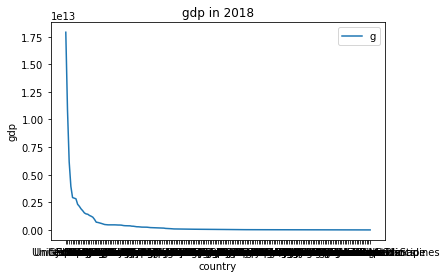

In [283]:
plotting_indicator_in_year(new_gdp,'2018', 'country', 'gdp', 'gdp in 2018')

In [284]:
dfx.reset_index().groupby(['year'])['gdp'].max()[-1]
dfx.query('gdp== 17900000000000.0')['gdp']

country        year
United States  2018    1.790000e+13
Name: gdp, dtype: float64

United State was number one in gdp in 2018

In [287]:
dfx.reset_index().groupby(['year'])['gdp'].min()[-1]
dfx.query('gdp== 206000000.0 & year=="2018"')['gdp']

country   year
Kiribati  2018    206000000.0
Name: gdp, dtype: float64

Kiribati was the lowest country in gdp in 2018

>First country United States with 17900000000000.0<br>
>Last country Kiribati with 206000000.0

##### rate of  increase 

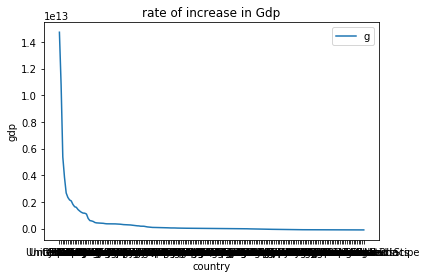

In [195]:
plotting_rate_of_increase(new_gdp,'2018', '1960',
                          'country', 'gdp', 
                          'rate of increase in Gdp')

That figer shows gdp diffrence between 1960 and 2018 after sorting countries for X axe and gdp for Y axe

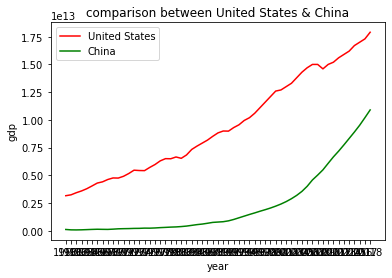

In [196]:
compare_two_country(dfx, 'United States', 'China', 'gdp', 
                    'red', 'green', 'United States', 'China', 
                     'year', 'gdp', 
                    'comparison between United States & China')

Compare between United States the country number one in the Gdp in 1960 and 2018 and China the country number two in Gdp increase

United States growth  for gdp from 1960 till 2018

#### Death_rate indicator

#####  Death_rate compare 1960 , 2018 

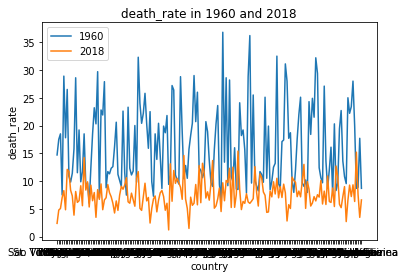

In [197]:
plotting_two_years_comparsion(new_death_rate,
                     '1960','2018','country',
                     'death_rate',
                     'death_rate in 1960 and 2018')

That figer showes that how death rate decrease in most of the countries from 1960 to 2018 country in X axe and death rate in y axes

In [289]:
new_death_rate.loc[:,'2018'].sum()-new_death_rate.loc[:,'1960'].sum()

-1575.7800000000002

Death Rate for all countries decreased  buy -1575.7800000000004 thorw 1960 to 2018

##### Death_rate in 1960 

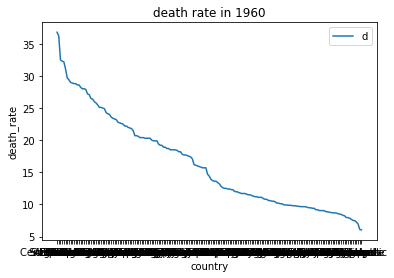

In [290]:
plotting_indicator_in_year(new_death_rate,'1960', 'country', 'death_rate', 'death rate in 1960')

That figer shows death rate in 1960 countries for X axe and death_rate for Y

In [92]:
dfx.reset_index().groupby(['year'])['death_rate'].max()[0]
dfx.query('death_rate== 36.8 ')['death_rate']

country  year
Mali     1960    36.8
Name: death_rate, dtype: float64

Mali was number one in death rate in 1960

In [93]:
dfx.reset_index().groupby(['year'])['death_rate'].min()[0]
dfx.query('year=="1960"&death_rate== 6.03')['death_rate']

country  year
Israel   1960    6.03
Name: death_rate, dtype: float64

Israel was the lowest country in death rate in 1960

>First country Mali with 36.8<br>
>Last country Israel with 6.03 

##### Death_rate in 2018 

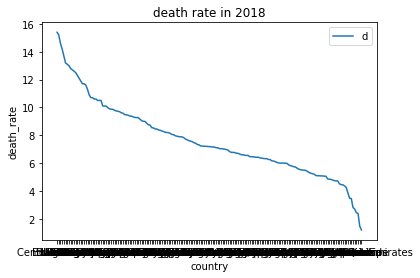

In [199]:
plotting_indicator_in_year(new_death_rate,'2018', 'country', 'death_rate', 'death rate in 2018')

That figer shows death rate in 2018 countries for X axe and death_rate for Y

In [95]:
dfx.reset_index().groupby(['year'])['death_rate'].max()[-1]
dfx.query('year=="2018" & death_rate== 15.4')['death_rate']

country   year
Bulgaria  2018    15.4
Name: death_rate, dtype: float64

Bulgaria was number one in death rate in 2018

In [293]:
dfx.reset_index().groupby(['year'])['death_rate'].min()[-1]
dfx.query('death_rate== 1.2')['death_rate']

country  year
Qatar    2018    1.2
Name: death_rate, dtype: float64

Qatar was the lowest country in death rate in 2018

>First country Bulgaria with 15.4<br>
>Last country Qatar with 1.2 

##### rate of  decrease  

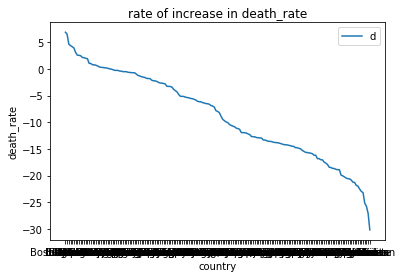

In [294]:
plotting_rate_of_increase(new_death_rate,'2018', '1960',
                          'country', 'death_rate', 
                          'rate of increase in death_rate')

That figer shows death rate diffrence between 1960 and 2018 after sorting countries for X axe and death rate for Y axe

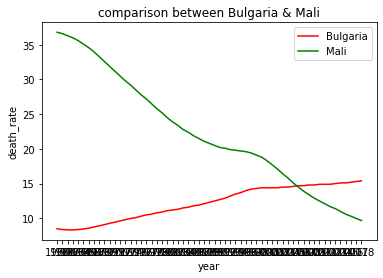

In [295]:
compare_two_country(dfx, 'Bulgaria', 'Mali', 'death_rate', 
                    'red', 'green', 'Bulgaria', 'Mali', 
                     'year', 'death_rate', 
                    'comparison between Bulgaria & Mali')

Compare between Bulgaria and Mali 

In [210]:
dfx.query('year=="1960" & country== "Mali"')['death_rate']

country  year
Mali     1960    36.8
Name: death_rate, dtype: float64

In [211]:
dfx.query('year=="2018" & country== "Mali"')['death_rate']

country  year
Mali     2018    9.69
Name: death_rate, dtype: float64

In [212]:
dfx.query('year=="1960" & country== "Bulgaria"')['death_rate']

country   year
Bulgaria  1960    8.49
Name: death_rate, dtype: float64

In [213]:
dfx.query('year=="2018" & country== "Bulgaria"')['death_rate']

country   year
Bulgaria  2018    15.4
Name: death_rate, dtype: float64

>Mali decrease death_rate from 36.8 in 1960 to 9.69 in 2018<br> 
>Bulgaria incresed death_rate from 8.49 in 1960 to 15.4  

#### Birth_rate indicator

##### Birth_rate compare 1960 , 2018 

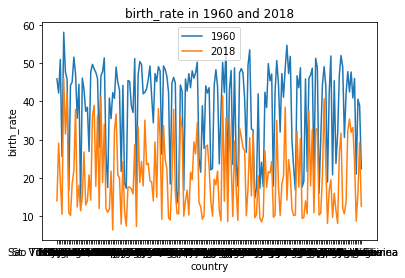

In [214]:
plotting_two_years_comparsion(new_birth_rate,
                     '1960','2018','country',
                     'birth_rate',
                     'birth_rate in 1960 and 2018')

That figer showes that how birth rate decrease in most of the countries from 1960 to 2018 country in X axe and population in y axes

In [291]:
new_birth_rate.loc[:,'2018'].sum()-new_death_rate.loc[:,'1960'].sum()

749.9599999999996

Birth Rate for all countries increase buy 749.96 thorw 1960 to 2018

##### Birth_rate in 1960 

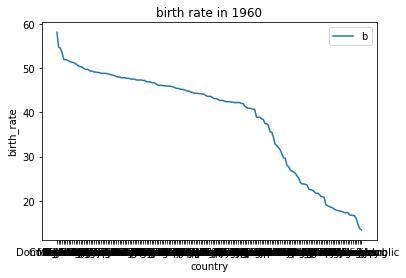

In [292]:
plotting_indicator_in_year(new_birth_rate,'1960', 'country', 'birth_rate', 'birth rate in 1960')

That figer shows birth rate in 1960 countries for X axe and birth rate for Y

In [217]:
dfx.reset_index().groupby(['year'])['birth_rate'].max()[0]
dfx.query('birth_rate== 58.1 ')['birth_rate']

country  year
Niger    1960    58.1
Name: birth_rate, dtype: float64

Niger was number one in birth rate in 1960

In [296]:
dfx.reset_index().groupby(['year'])['birth_rate'].min()[0]
dfx.query('year=="1960"&birth_rate== 13.4')['birth_rate']

country         year
Czech Republic  1960    13.4
Name: birth_rate, dtype: float64

Czech Republic was the lowest country in birth rate in 1960

>First country Niger with 58.1<br>
>Last country Czech Republic with 13.4 

##### Birth_rate in 2018 

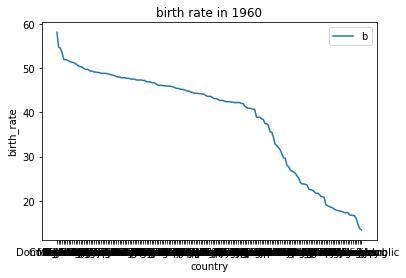

In [297]:
plotting_indicator_in_year(new_birth_rate,'1960', 'country', 'birth_rate', 'birth rate in 1960')

That figer shows birth rate in 2018 countries for X axe and birth rate for Y

In [298]:
dfx.reset_index().groupby(['year'])['birth_rate'].max()[-1]
dfx.query('year=="2018" & birth_rate== 46.1')['birth_rate']

country  year
Niger    2018    46.1
Name: birth_rate, dtype: float64

Niger was number one in birth rate in 2018

In [221]:
dfx.reset_index().groupby(['year'])['birth_rate'].min()[-1]
dfx.query('birth_rate== 6.4')['birth_rate']

country      year
South Korea  2018    6.4
Name: birth_rate, dtype: float64

South Korea was the lowest counrty in birth rate in 2018

>First country Niger with 46.1<br>
>Last country South Korea with 6.4 

##### rate of  increase  

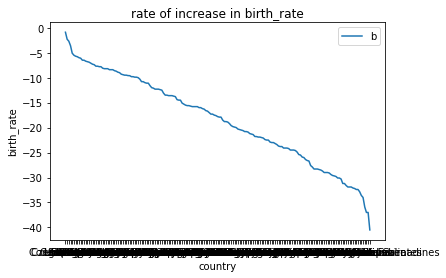

In [222]:
plotting_rate_of_increase(new_birth_rate,'2018', '1960',
                          'country', 'birth_rate', 
                          'rate of increase in birth_rate')

That figer shows birth rate diffrence between 1960 and 2018 after sorting countries for X axe and birth rate for Y axe

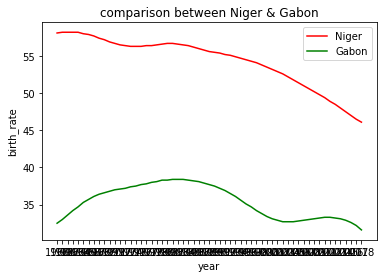

In [223]:
compare_two_country(dfx, 'Niger', 'Gabon', 'birth_rate', 
                    'red', 'green', 'Niger', 'Gabon', 
                     'year', 'birth_rate', 
                    'comparison between Niger & Gabon')

Compare between Niger the country number one in the Birth_rate for   1960 and 2018 and Gabon the country number one in birth_rate increase  

In [115]:
dfx.query('year=="1960" & country=="Gabon"')['birth_rate']

country  year
Gabon    1960    32.5
Name: birth_rate, dtype: float64

In [116]:
dfx.query('year=="2018" & country=="Gabon"')['birth_rate']

country  year
Gabon    2018    31.6
Name: birth_rate, dtype: float64

>Birth Rate in Niger is decreased from 58.1 in 1960 to 46.1 in 2018
>Birth Rate in Gabon is decreased from 32.5 in 1960 to 31.6 in 2018 although it's the country number one in birth_rate increase

### Are there trends that can be observed between the selected indicators?

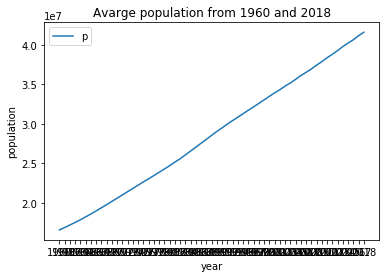

In [253]:
dp=dfx.reset_index().groupby(['year'])['population'].mean()
plt.plot(dp);
plt.legend('population')
plt.xlabel('year')
plt.ylabel('population')
plt.title('Avarge population from 1960 and 2018');

##### Population for all the data set throw years from 1960 to 2018

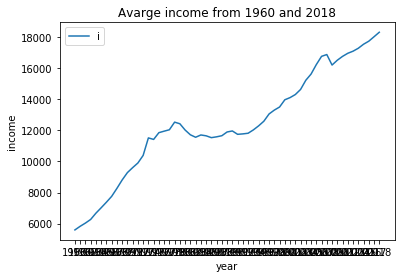

In [252]:
di=dfx.reset_index().groupby(['year'])['income'].mean()
plt.plot(di);
plt.legend('income')
plt.xlabel('year')
plt.ylabel('income')
plt.title('Avarge income from 1960 and 2018');

##### Income for all the data set throw years from 1960 to 2018

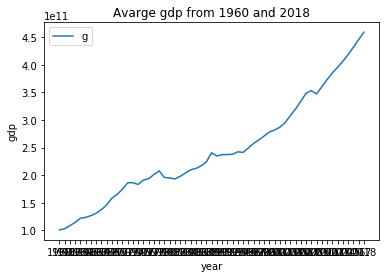

In [251]:
dg=dfx.reset_index().groupby(['year'])['gdp'].mean()
plt.plot(dg);
plt.legend('gdp')
plt.xlabel('year')
plt.ylabel('gdp')
plt.title('Avarge gdp from 1960 and 2018');

##### There are trends between population and income and Gdp 

##### Gdp for all the data set throw years from 1960 to 2018

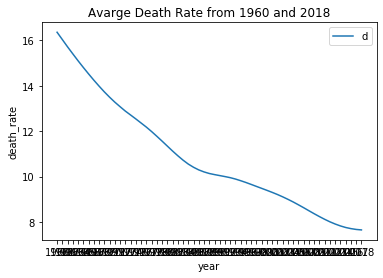

In [250]:
dd=dfx.reset_index().groupby(['year'])['death_rate'].mean()
plt.plot(dd);
plt.legend('death')
plt.xlabel('year')
plt.ylabel('death_rate')
plt.title('Avarge Death Rate from 1960 and 2018');

##### Death Rate for all the data set throw years from 1960 to 2018

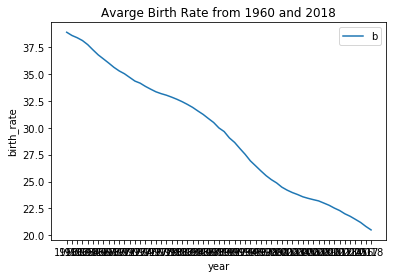

In [249]:
db=dfx.reset_index().groupby(['year'])['birth_rate'].mean()
plt.plot(db);
plt.legend('birth')
plt.xlabel('year')
plt.ylabel('birth_rate')
plt.title('Avarge Birth Rate from 1960 and 2018');

##### Birth Rate for all the data set throw years from 1960 to 2018

##### There are trends between Death Rate and Birth Rate 

<a id='conclusions'></a>
## Conclusions

#### Results:
###### - Population for all countries increase buy 4534244700 pepole thorw 1960 to 2018 .
###### - India growing in population in fast way more than china and other country .
###### - Income for all countries increase buy 2300050 thorw 1960 to 2018 .
###### - Qatar was the biggest growing for income from 1960 to 2018 .
###### - Gdp for all countries increase buy 64738808586115.47 thorw 1960 to 2018 .
###### - United Stats was the biggest growing for Gdp .
###### - Death Rate for all countries decreased buy -1575.7800000000004 thorw 1960 to 2018 .
###### - Mali decrease death_rate from 36.8 in 1960 to 9.69 in 2018 .
###### - Bulgaria incresed death_rate from 8.49 in 1960 to 15.4 .
###### - Birth Rate for all countries increase buy 749.96 thorw 1960 to 2018 . 
###### - Birth Rate in Niger is decreased from 58.1 in 1960 to 46.1 in 2018 . 
###### - Birth Rate in Gabon is decreased from 32.5 in 1960 to 31.6 in 2018 , although it's the country number one in birth_rate increase . 
###### - There are trends between population , income and gdp .   
###### - There are trends between death and birth rate .
#### Limitations:
##### -some data set years from 1960 and other from 1800 droped many columns
##### -different number of countries droped many columns
##### -too many missing values in some data set fill with mean effect of the accuracy of the result